### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar per month: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food per month: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house per month: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person per month: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar per month: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [341]:
data = pd.read_csv('data/coupons.csv')

In [342]:
# fix column naming
data = data.rename(columns={'passanger': 'passenger'})

In [343]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [345]:
# what % of each column has null/ N/A
data.isnull().sum() / data.shape[0] * 100

destination              0.000000
passenger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [346]:
# age distribution
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [347]:
# Occupation distribution
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [348]:
# car distribution
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [349]:
# Bar distribution
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [350]:
# % of table dropped if we drop any row w/ null in these columns (i.e. not including car)
(1 - (data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']).shape[0] / data.shape[0])) * 100

4.769788710186063

### Observations
* `car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50` all have some null values
  * `car` in particular has a lot. There doesn't seem to be anything that could be used to fill in the missing data, and doing any static fill-in from mean/median or any correlative extrapolation would skew the data given 99+% lack of data. Given < 1% is filled in, we likely should drop the column
  * Dropping the rows for the rest loses < 5% of the data, so this seems safe to drop as well
* The rest of the columns seem fine

3. Decide what to do about your missing data -- drop, replace, other...

In [351]:
# per above, drop `car` column and certain rows w/ null
clean_data = data.drop('car', axis=1).dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
clean_data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [352]:
clean_data.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [353]:
# What % of the data is left
clean_data.shape[0] / data.shape[0]

0.9523021128981394

4. What proportion of the total observations chose to accept the coupon?



In [354]:
clean_data['Y'].sum() / clean_data.shape[0]

np.float64(0.5693352098683666)

### Answer

56.9% of observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

In [355]:
clean_data['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

<Axes: xlabel='coupon'>

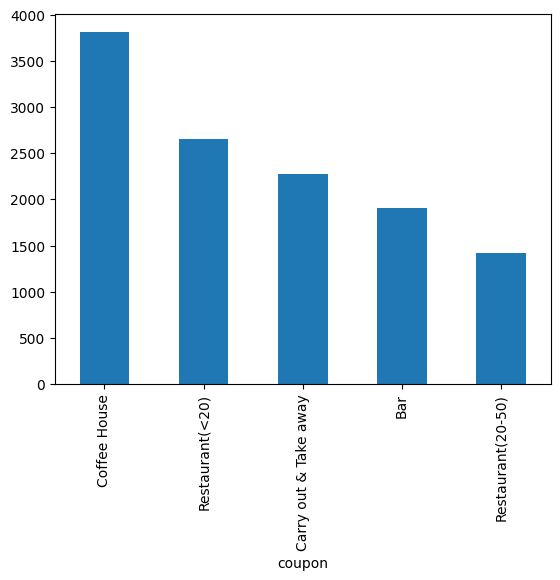

In [356]:
clean_data['coupon'].value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

In [357]:
clean_data['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

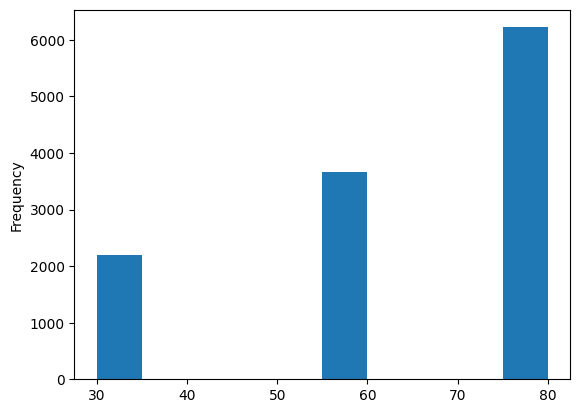

In [358]:
clean_data['temperature'].plot(kind='hist')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [359]:
bar_coupons = clean_data.query('coupon == "Bar"')
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [360]:
bar_coupons['Y'].sum() / bar_coupons.shape[0]

np.float64(0.41191845269210664)

### Answer

41.19% of Bar coupons were accepted overall.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [361]:
# some filtering constants

# visits 4 or more times a month
frequent_visitor = ['4~8', 'gt8']

# age is over 25
over_25 = ['26', '31', '36', '41', '46', '50plus']

# visits 1 or more times a month
regular_visitor = ['1~3', '4~8', 'gt8']

# passenger(s) that aren't kids
non_kid_passenger = ['Friend(s)', 'Partner']

# age is under 30
under_30 = ['below21', '21', '26']

# income is less than 50K
income_lt_50k = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
]

In [362]:
# get a sense of the distribution
bar_coupons['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [363]:
# Acceptance rate amongst frequent visitors
bar_coupons.query('Bar in @frequent_visitor')['Y'].sum() / bar_coupons.query('Bar in @frequent_visitor').shape[0]

np.float64(0.7616580310880829)

In [364]:
# Acceptance rate amongst non-frequent visitors
bar_coupons.query('Bar not in @frequent_visitor')['Y'].sum() / bar_coupons.query('Bar not in @frequent_visitor').shape[0]

np.float64(0.37267441860465117)

### Answer
Frequent Bar visitors accepted coupons 76.17% of the time, compared to infrequent visitors at 37.27%. That's more than **double the acceptance rate**.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [365]:
bar_coupons.query('Bar in @regular_visitor and age in @over_25')['Y'].sum() / bar_coupons.query('Bar in @regular_visitor and age in @over_25').shape[0]

np.float64(0.6898263027295285)

### Answer

Acceptance rate of 68.98%, which is lower than the frequent visitors (76.17%) but still higher than the infrequent visitors (37.27%) and the overall acceptance rate (41.19%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [366]:
clean_data['passenger'].value_counts()

passenger
Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: count, dtype: int64

In [367]:
_regular_bar_visitor_non_kid_passenger_not_farmer = bar_coupons.query('Bar in @regular_visitor and passenger in @non_kid_passenger and occupation != "Farming Fishing & Forestry"')
_regular_bar_visitor_non_kid_passenger_not_farmer['Y'].sum() / _regular_bar_visitor_non_kid_passenger_not_farmer.shape[0]

np.float64(0.7142857142857143)

### Answer

71.43% acceptance rate, which is still on the higher end, compared to the above.

In [368]:
bar_results = pd.DataFrame(
    [
        ('Regular bar visitor with non-kid passenger<br>and occupation not Farming, Fishing, or Forestry', 'Bar in @regular_visitor and passenger in @non_kid_passenger and occupation != "Farming Fishing & Forestry"'),
        ('Frequent visitors', 'Bar in @frequent_visitor'),
        ('Infrequent visitors', 'Bar not in @frequent_visitor'),
        ('Baseline', None),
        ('Regular visitor over 25', 'Bar in @regular_visitor and age in @over_25'),
    ],
    columns=['Driver Type', 'query'],
)
def query(q):
    if q is not None:
        return bar_coupons.query(q)['Y'].sum() / bar_coupons.query(q).shape[0]
    else:
        return bar_coupons['Y'].sum() / bar_coupons.shape[0]

bar_results['Acceptance Rate'] = bar_results['query'].apply(query)
bar_results

,Driver Type,query,Acceptance Rate
0,Regular bar visitor with non-kid passenger<br>...,Bar in @regular_visitor and passenger in @non_...,0.714286
1,Frequent visitors,Bar in @frequent_visitor,0.761658
2,Infrequent visitors,Bar not in @frequent_visitor,0.372674
3,Baseline,None,0.411918
4,Regular visitor over 25,Bar in @regular_visitor and age in @over_25,0.689826


In [369]:
### Scatter plot to help visualize the differences in acceptance rate
fig = px.scatter(bar_results.sort_values('Acceptance Rate'), x='Driver Type', y='Acceptance Rate', color='Driver Type')
fig.update_layout(
    height=500,
)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [370]:
clean_data['maritalStatus'].value_counts()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

In [371]:
bar_coupons.query('Bar in @frequent_visitor and passenger in @non_kid_passenger and maritalStatus != "Widowed"')['Y'].sum() / bar_coupons.query('Bar in @frequent_visitor and passenger in @non_kid_passenger and maritalStatus != "Widowed"').shape[0]

np.float64(0.6949152542372882)

In [372]:
bar_coupons.query('Bar in @frequent_visitor and age in @under_30')['Y'].sum() / bar_coupons.query('Bar in @frequent_visitor and age in @under_30').shape[0]

np.float64(0.8)

In [373]:
bar_coupons.income.value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [374]:
bar_coupons.query('RestaurantLessThan20 in @frequent_visitor and income in @income_lt_50k')['Y'].sum() / bar_coupons.query('RestaurantLessThan20 in @frequent_visitor and income in @income_lt_50k').shape[0]

np.float64(0.45645645645645644)

In [375]:
# Scatter plot to visualize comparison

results = pd.DataFrame(
    [ 
        ('Drivers who go to bars more<br>than once a month, had passengers<br>that were not a kid, and were not<br>widowed', 'Bar in @frequent_visitor and passenger in @non_kid_passenger and maritalStatus != "Widowed"'),
        ('Drivers who go to bars more<br>than once a month and are under<br>the age of 30', 'Bar in @frequent_visitor and age in @under_30'),
        ('Drivers who go to cheap<br>restaurants more than 4 times a<br>month and income is less than 50K', 'RestaurantLessThan20 in @frequent_visitor and income in @income_lt_50k'),
    ],
    columns=['Driver Type', 'query'],
)
results['Acceptance Rate'] = results['query'].apply(lambda q: bar_coupons.query(q)['Y'].sum() / bar_coupons.query(q).shape[0])
results

px.scatter(results, x='Driver Type', y='Acceptance Rate', color='Driver Type')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [376]:
overall_results = pd.concat([bar_results, results])
overall_results

,Driver Type,query,Acceptance Rate
0,Regular bar visitor with non-kid passenger<br>...,Bar in @regular_visitor and passenger in @non_...,0.714286
1,Frequent visitors,Bar in @frequent_visitor,0.761658
2,Infrequent visitors,Bar not in @frequent_visitor,0.372674
3,Baseline,None,0.411918
4,Regular visitor over 25,Bar in @regular_visitor and age in @over_25,0.689826
0,Drivers who go to bars more<br>than once a mon...,Bar in @frequent_visitor and passenger in @non...,0.694915
1,Drivers who go to bars more<br>than once a mon...,Bar in @frequent_visitor and age in @under_30,0.800000
2,Drivers who go to cheap<br>restaurants more th...,RestaurantLessThan20 in @frequent_visitor and ...,0.456456


In [377]:
fig = px.scatter(overall_results.sort_values('Acceptance Rate'), x='Driver Type', y='Acceptance Rate', color='Driver Type')
fig.update_layout(
    height=700,
)

### Hypotheses
* High frequency bar patrons (4+ times per month) have higher acceptance rates (~1.85x) compared to overall population of drivers who received bar coupons.
* Bar frequency was a high contributing factor to acceptance rate, with other factors having less of an impact (passenger type, marital status, age)
* Higher frequency was positively correlated with acceptance rate, while lower frequency was negaitvely correlated with acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [378]:
coffee_coupons = clean_data.query('coupon == "Coffee House"')
coffee_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [379]:
coffee_coupons.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

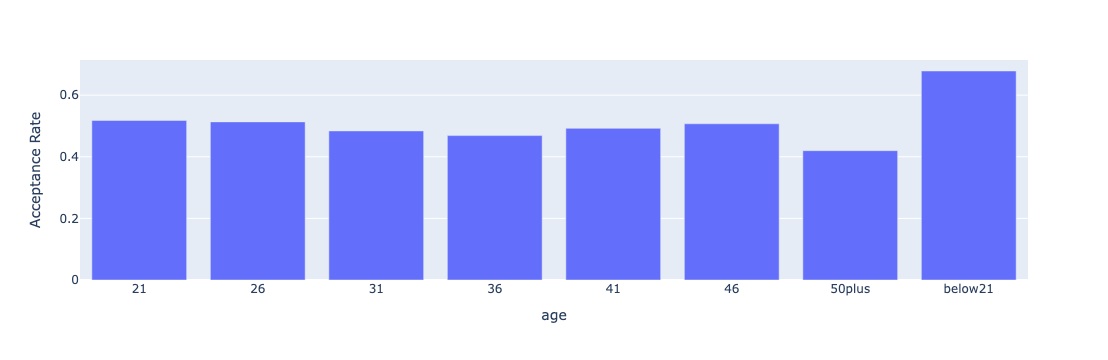

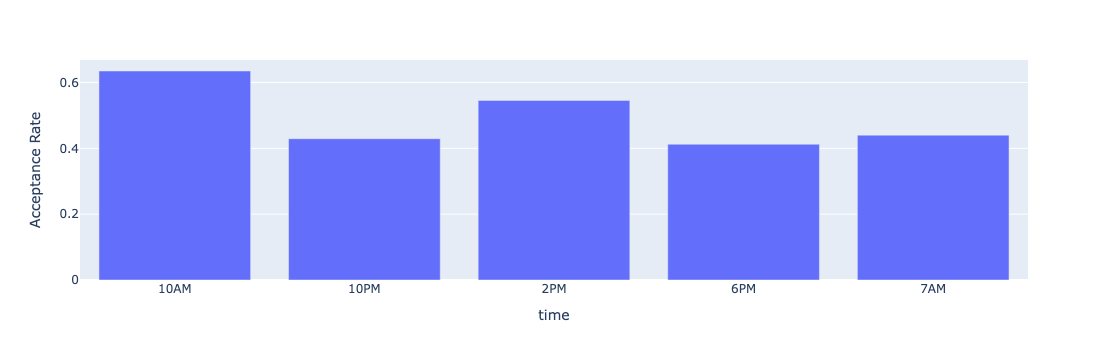

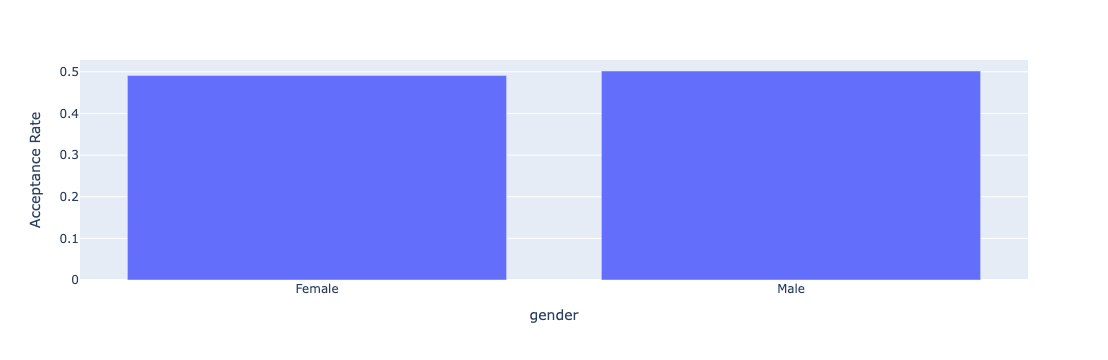

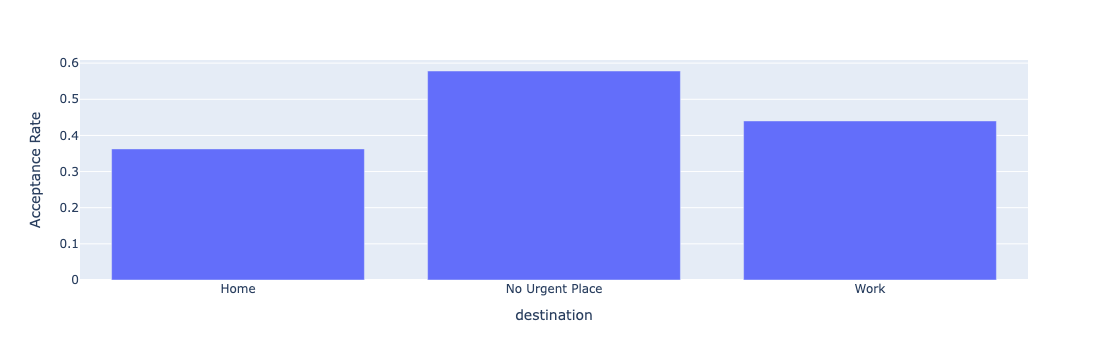

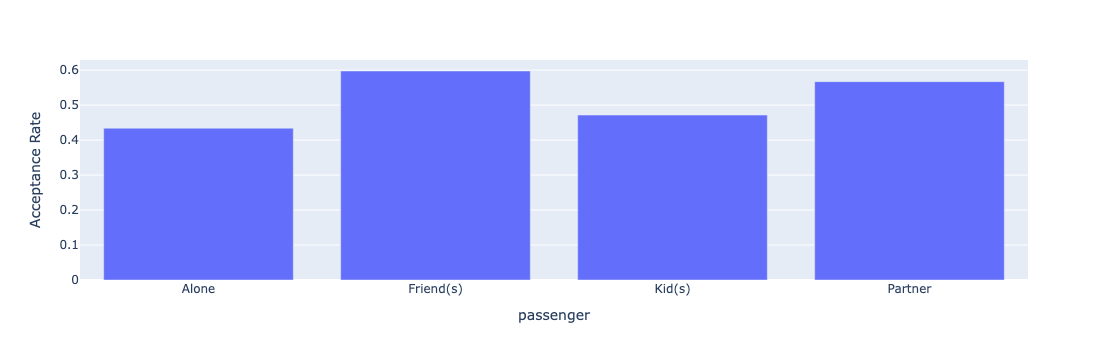

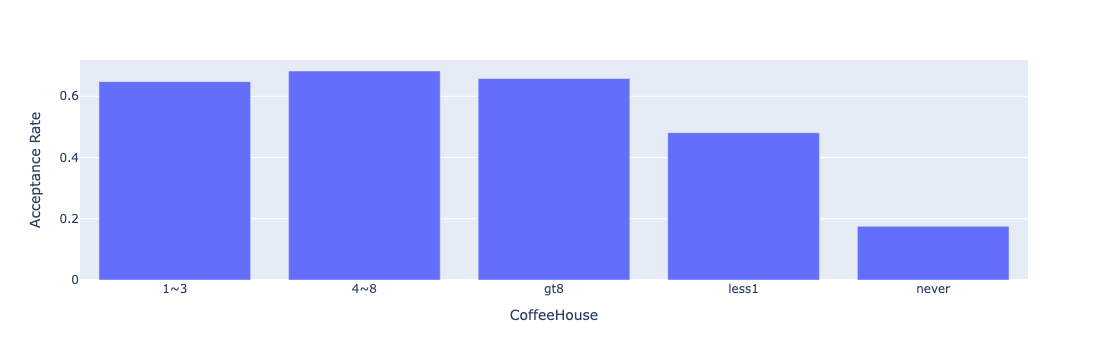

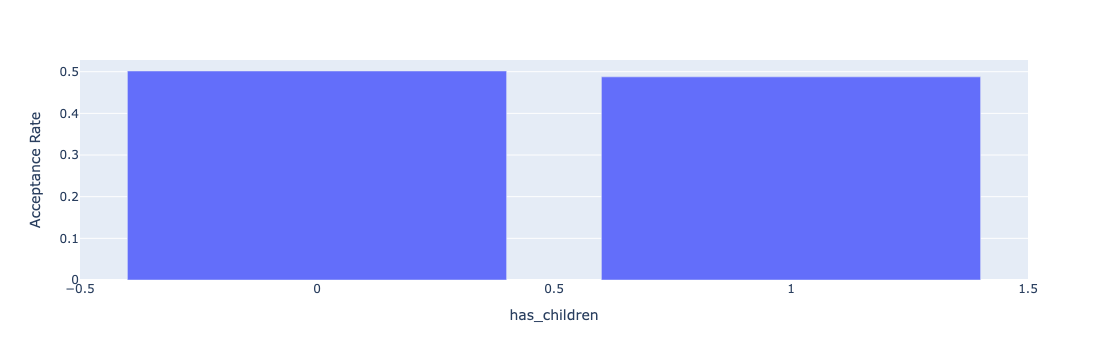

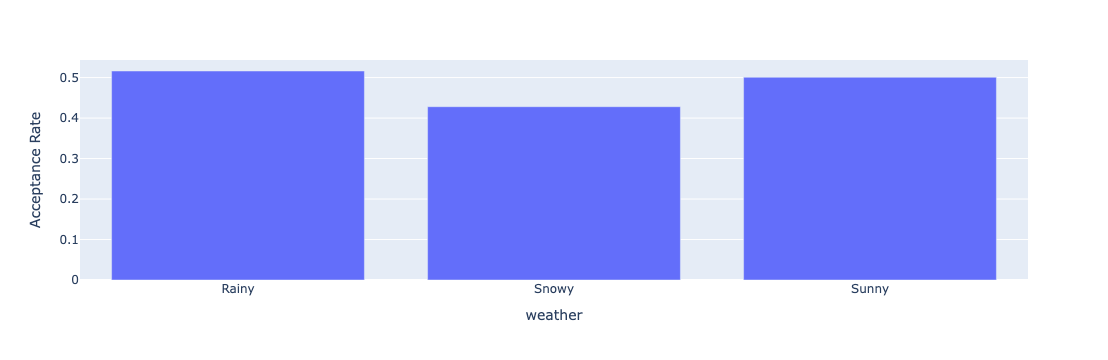

In [380]:
# helper function for plotting acceptance rate for the unique values in a given column
def plot_acceptance_rates(df, c, yaxis_title=None):
    fig = px.bar(df.groupby(c).apply(lambda s: s['Y'].sum() / s.shape[0], include_groups=False))
    fig.update_layout(yaxis_title=yaxis_title or "Acceptance Rate", showlegend=False)
    fig.show()


# acceptance rate for various values
plot_acceptance_rates(coffee_coupons, 'age')
plot_acceptance_rates(coffee_coupons, 'time')
plot_acceptance_rates(coffee_coupons, 'gender')
plot_acceptance_rates(coffee_coupons, 'destination')
plot_acceptance_rates(coffee_coupons, 'passenger')
plot_acceptance_rates(coffee_coupons, 'CoffeeHouse')
plot_acceptance_rates(coffee_coupons, 'has_children')
plot_acceptance_rates(coffee_coupons, 'weather')

In [383]:
# 
coffee_coupons.query('CoffeeHouse in @regular_visitor')['Y'].sum()/coffee_coupons.query('CoffeeHouse in @regular_visitor').shape[0]

np.float64(0.6589935760171306)

### Initial Observations
* Coupon acceptance rate correlates with visiting frequency
* Time of day seems to be a factor, with 10AM and 2PM being higher than the others. This could be related to typical break times for workers
* Passenger type of Friend(s) and Partner have higher acceptance rates
* Destination Type is also a factor, indicating that people with no specific destination are more open to accepting
* Looking at Passenger type, Destination and Time, there seems to be a narrative of people being open to these coupons during casual, social times

In [381]:
# Measure the acceptance rate of these "social drivers" as suggested by the last bullet point
break_times = ['10AM', '2PM']
social_passengers = ['Friend(s)', 'Partner']

social_coffee = coffee_coupons.query('time in @break_times and passenger in @social_passengers and destination == "No Urgent Place"')
social_coffee['Y'].sum() / social_coffee.shape[0]

np.float64(0.5892547660311959)

Interestingly, **combining these factors together doesn't give a multiplicative effect**. The acceptance rate is still around 60%, which is what we observed invidually for each factor.

In [382]:
# let's see if these are multipliers when combined with frequency
plot_acceptance_rates(coffee_coupons, 'CoffeeHouse', 'Baseline')
plot_acceptance_rates(coffee_coupons.query('time in @break_times'), 'CoffeeHouse', 'Break Times')
plot_acceptance_rates(coffee_coupons.query('passenger in @social_passengers'), 'CoffeeHouse', 'Social passengers')
plot_acceptance_rates(coffee_coupons.query('destination == "No Urgent Place"'), 'CoffeeHouse', 'No Urgent Place')
plot_acceptance_rates(social_coffee, 'CoffeeHouse', 'Social Driver')

### Final Conclusion
* Only some of the identified factors improve the acceptance rate over the baseline
* Specifically, drivers who go to coffee shops frequently and are driving with Partner/Friend passengers at 10AM/2PM have a **very high acceptance rate**
* Given likely limitations of the product and because combining multiple factors reaches diminishing returns, we can likely focuse on time of day rather than passenger type.
* Overall recommendation is to **target coffee coupons to drivers who visit coffee shops at least once a month around 10 AM or 2 PM**.